In [8]:

import gym
import matplotlib
import numpy as np
import sys
%matplotlib inline


from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [9]:
env = BlackjackEnv()

In [34]:
def print_observation(observation):
    score, dealer_score, usable_ace = observation
    print("Player Score: {} (Usable Ace: {}), Dealer Score: {}".format(
          score, usable_ace, dealer_score))

In [120]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """
    # Keeps track of sum and count of returns for each state to calculate an average
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)    
    # The final value function
    V = defaultdict(float)
    state = env.reset()
    for ep in range(num_episodes):
        episode = []
        observation = env.reset()
        for t in range(100):
            action = policy(observation)
            next_observation, reward, done, _ = env.step(action)
            episode.append((observation, action, reward))
            if done:
                break
            observation = next_observation            
        states_in_episode = set([tuple(x[0]) for x in episode])
        for state in states_in_episode:
            first_visit_idx = [i for i,x in enumerate(episode) if x[0] == state][0]
            G = sum([x[2] * (discount_factor**i) for i,x in enumerate(episode[first_visit_idx:])])            
            returns_sum[state] += G
            returns_count[state] += 1.0
            V[state] = returns_sum[state]/returns_count[state]
    return V    

In [121]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

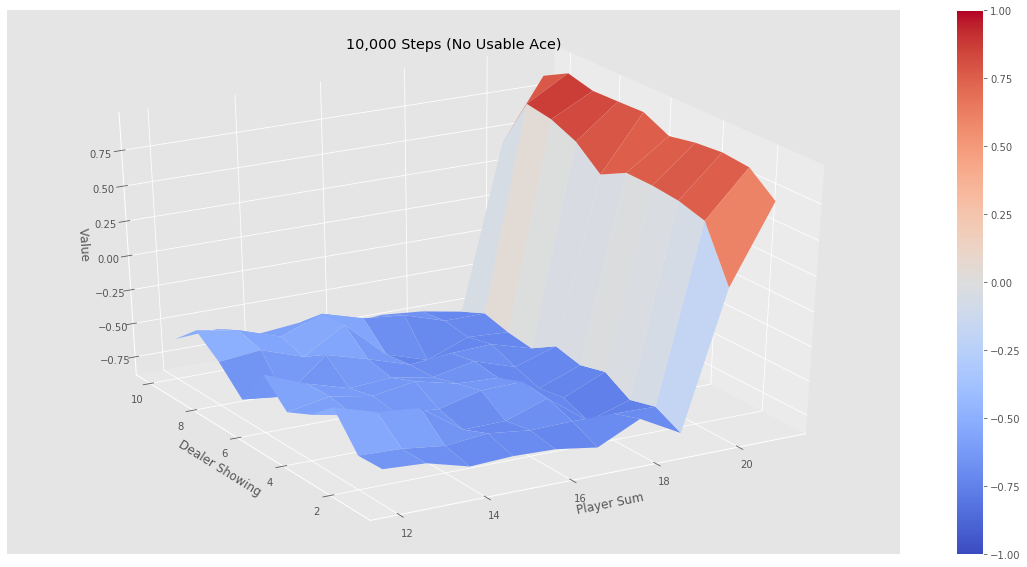

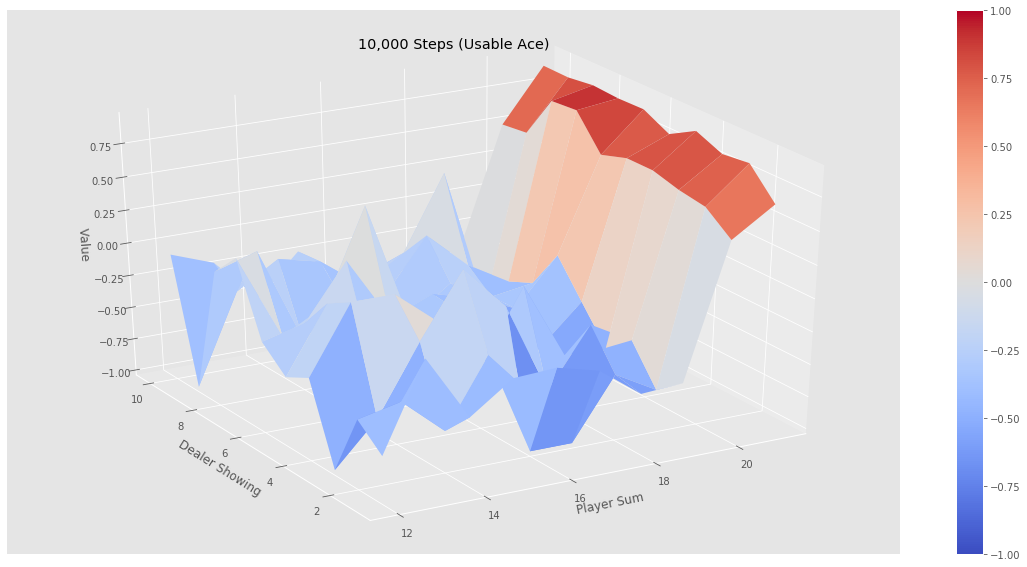

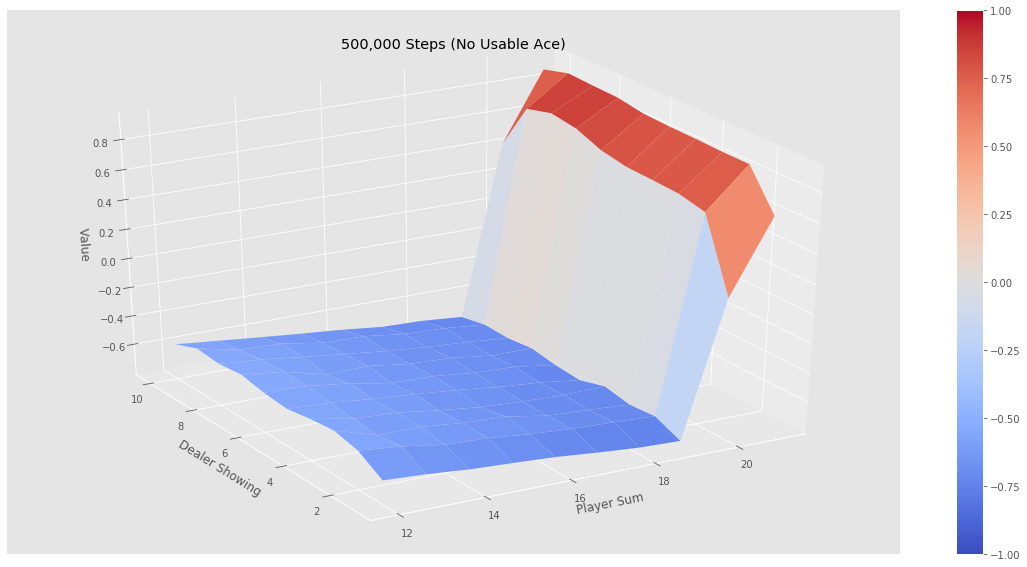

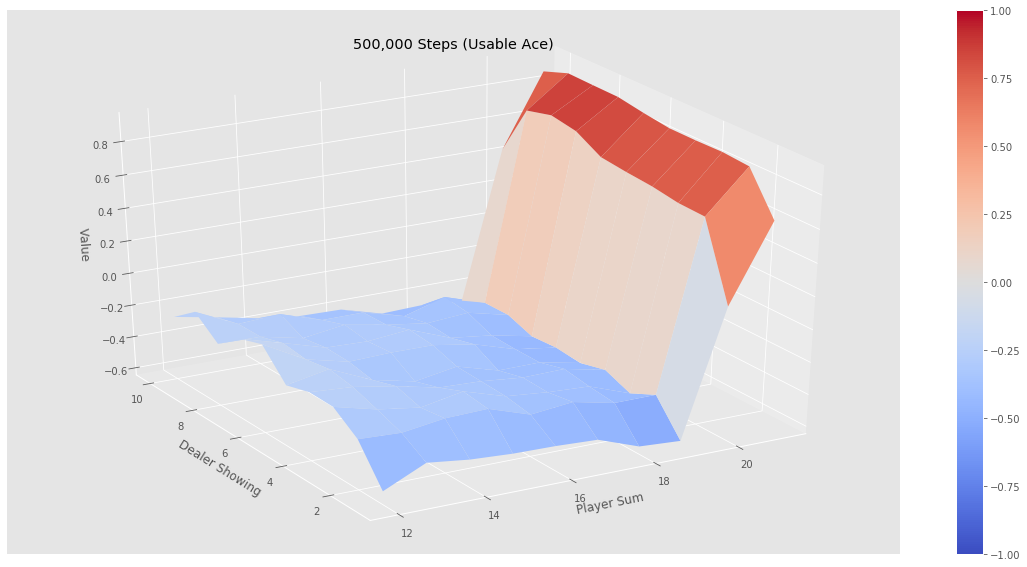

In [123]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")